In [1]:
import types
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gauss_circle(r, i):
    """ Returns a given term from the gauss' circle problem. """
    sum_term = np.floor(pow(r, 2)/(4*i+1)) - np.floor(pow(r,2)/(4*i+3))
    return sum_term

In [15]:
#Plane Ray group
radius = 1
nrays = 200000 #Need to find relationship for circular plate
pos = [10., 10., 20.]

N_r = 1+4*np.sum(gauss_circle(np.sqrt(nrays), np.arange(0,500000,1)))
x_mesh = np.linspace(-radius+0.5, radius+0.5, int((2*np.sqrt(nrays))**2/(N_r) * np.sqrt(nrays)), endpoint=False)
y_mesh = np.linspace(-radius+0.5, radius+0.5, int((2*np.sqrt(nrays))**2/(N_r) * np.sqrt(nrays)), endpoint=False)
x_points, y_points = np.meshgrid(x_mesh, y_mesh)

xs, ys = x_points.ravel(), y_points.ravel()
dis = np.sqrt(pow(xs,2) + pow(ys, 2))
if isinstance(pos, types.ListType):
    x_circ, y_circ = xs[dis < radius] + pos[0], ys[dis < radius] + pos[1]
    z_circ = [pos[2]]*len(x_circ)
else:
    x_circ, y_circ = xs[dis < radius], ys[dis < radius]
    z_circ = [pos]*len(x_circ) #Should Transform for d

P_arr = np.vstack((x_circ, y_circ, z_circ)).T
D_arr = np.array([[0.,0.,1.]] *len(x_circ)) #Do I even understand D for a ray?

In [4]:
int(np.sqrt(nrays))*N_r

280861275.0

In [16]:
(2*np.sqrt(nrays))**2/(N_r)

1.2732264353638643

In [6]:
4 / np.pi

1.2732395447351628

In [7]:
int(np.sqrt(nrays)*4/np.pi)

569

In [8]:
N_r

628325.0

In [9]:
np.shape(P_arr)

(161614, 3)

In [10]:
N_r

628325.0

In [11]:
np.pi*200000**2

125663706143.59172

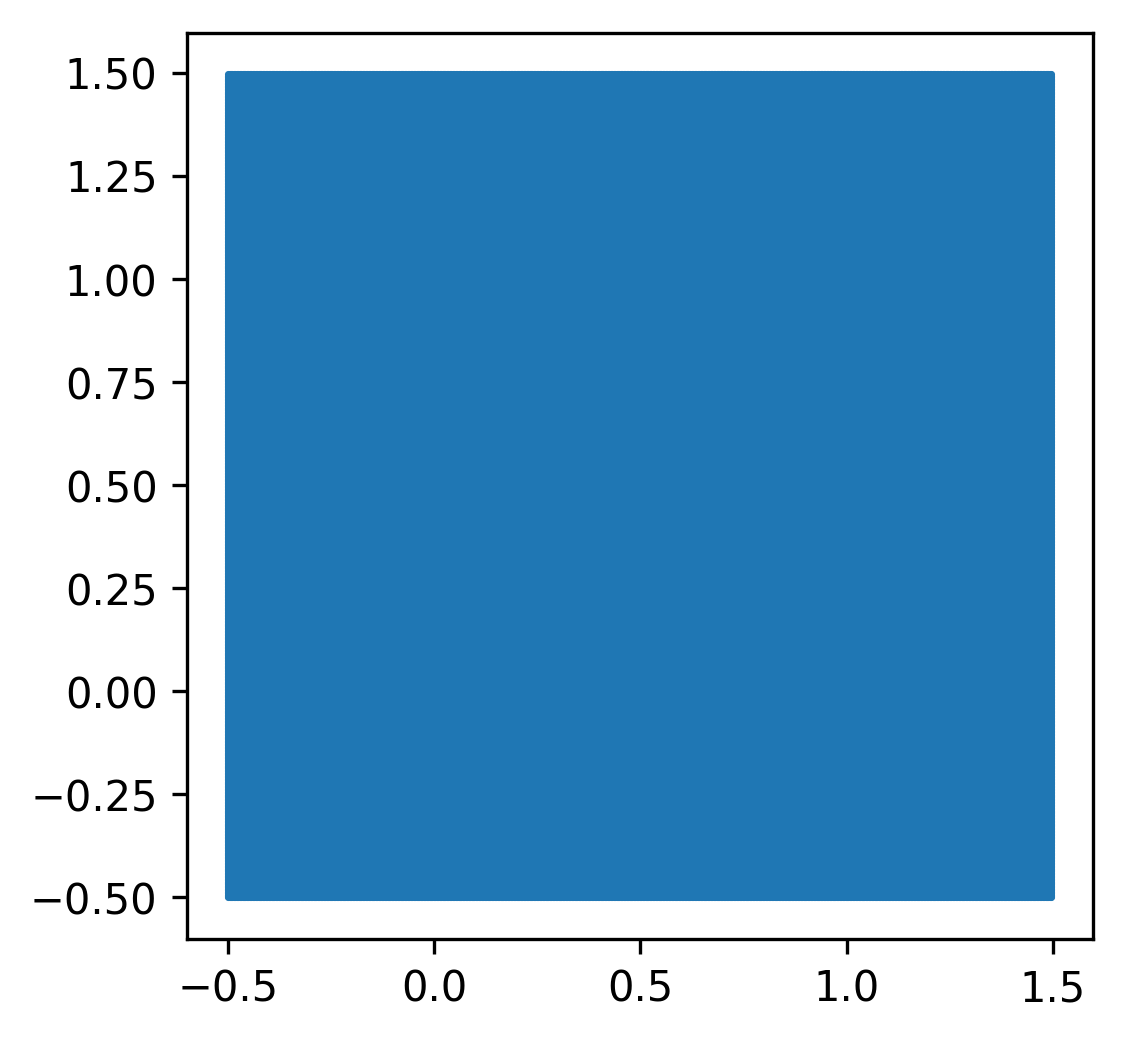

In [12]:
plt.figure(dpi=300)
plt.subplot(1,1,1, aspect='equal')
plt.scatter(x_points, y_points, s=0.5)
plt.show()

In [13]:
len(x_circ)

161614

In [14]:
def raygroup(typeof, geo, pos, radius, d=None, ang=None, nrays=100):
    """ Creates a group of rays and propagates them through geometry. """
    if typeof == 'plane':
        x_mesh = np.linspace(-radius, radius, nrays)
        y_mesh = np.linspace(-radius, radius, nrays)
        x_points, y_points = np.meshgrid(x_mesh, y_mesh)
    elif typeof == 'fan':
        D_arr = 10*np.random.rand(nrays, 3)
        D_arr[:,1]*=np.random.uniform(-1,1,nrays)
        D_arr[:,0]*=np.random.uniform(-1,1,nrays)
        if isinstance(pos, types.ListType):
            P_arr = [pos] * (2*nrays)
        else:
            P_arr = np.zeros((2*nrays,3))
            P_arr[:,2] = pos

    rays = [ray(params={'D':D, 'P':P}) for D,P in zip(D_arr, P_arr)]
    for rayiter in rays:
        rayiter.propagate(geo,inters)
    return rays